In [1]:
import numpy as np
from circuit_knitting.cutting.cut_finding.circuit_interface import SimpleGateList
from circuit_knitting.cutting.cut_finding.lo_cuts_optimizer import LOCutsOptimizer
from circuit_knitting.cutting.cut_finding.optimization_settings import (
    OptimizationSettings,
)
from circuit_knitting.cutting.cut_finding.quantum_device_constraints import (
    DeviceConstraints,
)

## Cut finding for efficient SU(2) Circuit with linear entanglement

### Visualize the circuit

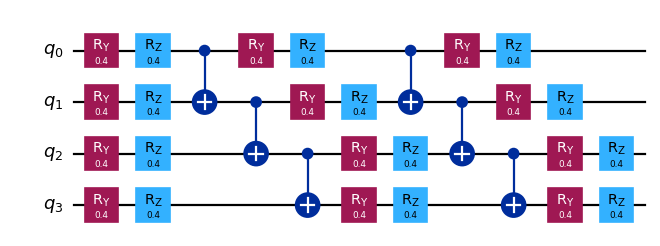

In [2]:
from qiskit.circuit.library import EfficientSU2
from circuit_knitting.cutting.cut_finding.cco_utils import qc_to_cco_circuit

qc = EfficientSU2(4, entanglement="linear", reps=2).decompose()
qc.assign_parameters([0.4] * len(qc.parameters), inplace=True)

circuit_ckt = qc_to_cco_circuit(qc)

qc.draw("mpl", scale=0.8)

### Perform cut finding

In [4]:
settings = OptimizationSettings(seed=12345)

settings.set_engine_selection("CutOptimization", "BestFirst")


qubits_per_qpu = 4
max_subcircuits = 2


for max_subcircuits in range(max_subcircuits, 1, -1):
    for qubits_per_qpu in range(qubits_per_qpu, 1, -1):
        print(
            f"\n\n---------- {qubits_per_qpu} Qubits per QPU, {max_subcircuits} maximum subcircuits ----------"
        )

        constraint_obj = DeviceConstraints(
            qubits_per_qpu=qubits_per_qpu, max_subcircuits=max_subcircuits
        )

        interface = SimpleGateList(circuit_ckt)

        op = LOCutsOptimizer(interface, settings, constraint_obj)

        out = op.optimize()

        print(
            " Gamma =",
            None if (out is None) else out.upper_bound_gamma(),
            ", Min_gamma_reached =",
            op.minimum_reached(),
        )
        if out is not None:
            out.print(simple=True)
        else:
            print(out)

        print(
            "Subcircuits:",
            interface.export_subcircuits_as_string(name_mapping="default"),
            "\n",
        )



---------- 4 Qubits per QPU, 2 maximum subcircuits ----------
 Gamma = 1.0 , Min_gamma_reached = True
[]
Subcircuits: AAAA 



---------- 3 Qubits per QPU, 2 maximum subcircuits ----------
 Gamma = 9.0 , Min_gamma_reached = True
[CutIdentifier(cut_action='CutTwoQubitGate', gate_cut_location=GateCutLocation(instruction_id=17, gate_name='cx', qubits=[2, 3])), CutIdentifier(cut_action='CutTwoQubitGate', gate_cut_location=GateCutLocation(instruction_id=25, gate_name='cx', qubits=[2, 3]))]
Subcircuits: AAAB 



---------- 2 Qubits per QPU, 2 maximum subcircuits ----------
 Gamma = 9.0 , Min_gamma_reached = True
[CutIdentifier(cut_action='CutTwoQubitGate', gate_cut_location=GateCutLocation(instruction_id=9, gate_name='cx', qubits=[1, 2])), CutIdentifier(cut_action='CutTwoQubitGate', gate_cut_location=GateCutLocation(instruction_id=20, gate_name='cx', qubits=[1, 2]))]
Subcircuits: AABB 



## Cut finding for 7 qubit circuit

### Visualize the circuit

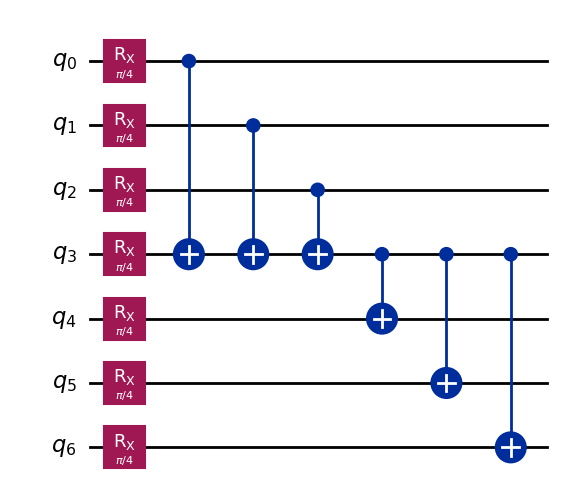

In [5]:
from qiskit import QuantumCircuit

qc_0 = QuantumCircuit(7)
for i in range(7):
    qc_0.rx(np.pi / 4, i)
qc_0.cx(0, 3)
qc_0.cx(1, 3)
qc_0.cx(2, 3)
qc_0.cx(3, 4)
qc_0.cx(3, 5)
qc_0.cx(3, 6)

qc_0.draw("mpl")

### Perform cut finding

In [6]:
circuit_ckt_wirecut = qc_to_cco_circuit(qc_0)

settings = OptimizationSettings(seed=12345)

settings.set_engine_selection("CutOptimization", "BestFirst")

qubits_per_qpu = 7
max_subcircuits = 2


for max_subcircuits in range(max_subcircuits, 1, -1):
    for qubits_per_qpu in range(qubits_per_qpu, 1, -1):
        print(
            f"\n\n---------- {qubits_per_qpu} Qubits per QPU, {max_subcircuits} maximum subcircuits ----------"
        )

        constraint_obj = DeviceConstraints(
            qubits_per_qpu=qubits_per_qpu, max_subcircuits=max_subcircuits
        )

        interface = SimpleGateList(circuit_ckt_wirecut)

        op = LOCutsOptimizer(interface, settings, constraint_obj)

        out = op.optimize()

        print(
            " Gamma =",
            None if (out is None) else out.upper_bound_gamma(),
            ", Min_gamma_reached =",
            op.minimum_reached(),
        )
        if out is not None:
            out.print(simple=True)
        else:
            print(out)

        print(
            "Subcircuits:",
            interface.export_subcircuits_as_string(name_mapping="default"),
            "\n",
        )



---------- 7 Qubits per QPU, 2 maximum subcircuits ----------
 Gamma = 1.0 , Min_gamma_reached = True
[]
Subcircuits: AAAAAAA 



---------- 6 Qubits per QPU, 2 maximum subcircuits ----------
 Gamma = 3.0 , Min_gamma_reached = True
[CutIdentifier(cut_action='CutTwoQubitGate', gate_cut_location=GateCutLocation(instruction_id=12, gate_name='cx', qubits=[3, 6]))]
Subcircuits: AAAAAAB 



---------- 5 Qubits per QPU, 2 maximum subcircuits ----------
 Gamma = 4.0 , Min_gamma_reached = True
[OneWireCutIdentifier(cut_action='CutLeftWire', wire_cut_location=WireCutLocation(instruction_id=11, gate_name='cx', qubits=[3, 5], input=1))]
Subcircuits: AAAABABB 



---------- 4 Qubits per QPU, 2 maximum subcircuits ----------
 Gamma = 4.0 , Min_gamma_reached = True
[OneWireCutIdentifier(cut_action='CutLeftWire', wire_cut_location=WireCutLocation(instruction_id=10, gate_name='cx', qubits=[3, 4], input=1))]
Subcircuits: AAAABBBB 



---------- 3 Qubits per QPU, 2 maximum subcircuits ----------
 Gamma